### Supervised-Learning(지도 학습)
지도 학습에는 분류(classifier)와 회귀(regression)가 있다.

- 분류 : 분류는 미리 정의된, 가능성 있는 여러 `클래스 레이블 `중 하나를 예측하는 것이다. 분류는 딱 두 개의 클래스로 분류하는 `이진 분류`와 셋 이상의 클래스로 분류하는 `다중 분류`문제로 나뉜다. 
- 회귀 : 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 `부동소수점수(실수)`를 예측하는 것이다. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 문제를 한 예시로 들 수 있다.

### 일반화, 과대적합, 과소적합
- 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 `일반화`되었다고 한다. 그래서 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 한다.
- 과대 적합 : 모델이 훈련 세트와 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다. 이러한 경우의 반대되는 경우를 과소적합이라고 한다. 모델이 너무 간단한 경우를 의미한다.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# 분류용 데이터셋
cancer = load_breast_cancer()
print(f"cancer's keys : {cancer.keys()}")
print(f"cancer['data']'s shape : {cancer['data'].shape}")
print(cancer['target'].shape)
# cancer['target_anems'] : cancer['target'] = malignant(악성):0, benign(양성):1
print("클래스 별 샘플 개수 : {0}".format({n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))})) # np.bincount : ndarray내부에 있는 0~9까지의 정수의 빈도수를 출력.

# feature_names 속성을 확인하면 각 특성의 의미를 파악할 수 있다.
print(f"특성 이름 : {cancer['feature_names']}")

cancer's keys : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer['data']'s shape : (569, 30)
(569,)
클래스 별 샘플 개수 : {'malignant': 212, 'benign': 357}
특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = cancer['data'], cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(round(knn.score(X_test, y_test), 2))

[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
0.92


### 선형 회귀(최소 제곱법)
선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균 제곱 오차를 최소화하는 파라미터 w와 b를 찾습니다. 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것입니다. 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없습니다.

In [3]:
from sklearn.linear_model import LinearRegression
import mglearn, warnings
from sklearn.datasets import fetch_openml

warnings.filterwarnings('ignore')

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터인 w는 가중치 또는 계수 라고 하며, lr 객체의 coef_ 속성에 저장되어 있고 편향 또는 절편 파라미터인 b는 intercept_에 저장되어 있다.
print(f"b : {lr.intercept_}") # intercept속성은 항상 하나이지만
print(f"w : {lr.coef_}") # coef속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열로 출력된다. 현재 위에서 생성한 wave 데이터셋에 특성이 하나밖에 없는 관계로 하나만 출력이 된 상태이다.

# 성능 평가
print(f"훈련 세트 점수 : {round(lr.score(X_train, y_train), 2)}")
print(f"테스트 세트 점수 : {round(lr.score(X_test, y_test), 2)}")
# 훈련 세트 - 테스트 세트 = 큰 경우 -> 과대적합 : 훈련 세트에 다양한 샘플이 없어 검증 세트에 제대로 적응하지 못함
# 훈련 세트 - 테스트 세트 = 차이가 작고, 두 세트 모두 적당한 점수를 가질 때 -> 적정
# 훈련 세트 - 테스트 세트 = 차이가 작은데 두 세트 모두 낮은 점수를 가질 때 -> 과소적합 : 모델이 복잡하지 않아 훈련 데이터에 있는 패턴을 모두 잡아내지 못함

# 따라서 위 상태는 과소적합인 것으로 판별.
# 조금 더 복잡한 데이터셋으로 진행
X, y = fetch_openml(name="boston", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X.shape)
# lr = LinearRegression().fit(X_train, y_train)
# print(lr.score(X_train, y_train))
# print(lr.score(X_test, y_test))

b : -0.01711124414733381
w : [0.44153666]
훈련 세트 점수 : 0.66
테스트 세트 점수 : 0.69
(506, 13)


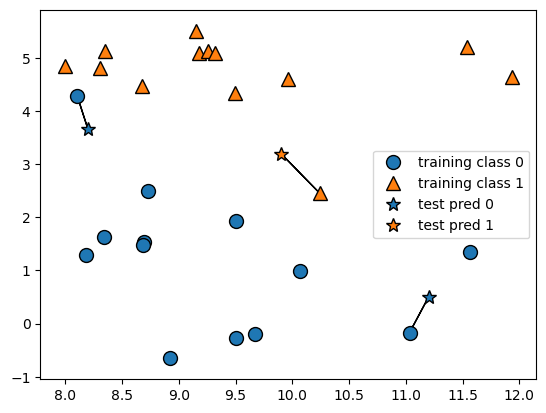

In [4]:
import pandas as pd, mglearn

pd.set_option('display.max_columns', None) 

# k-최근접 이웃 분류
# 가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용합니다. 단순히 이 훈련 데이터 포인트의 출력이 예측됩니다.
X, y = mglearn.datasets.load_extended_boston()

# 아래 그림은 forge 데이터셋을 이렇게 분류한 것입니다.
mglearn.plots.plot_knn_classification(n_neighbors=1)

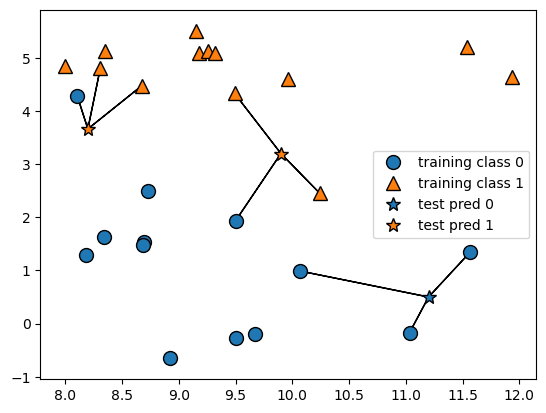

In [5]:
# 아래 그림에서는 데이터 포인트 3개를 추가했습니다.
mglearn.plots.plot_knn_classification(n_neighbors=3)

predict about test set : [1 0 1 0 1 0 0]
the score of test set : 0.86


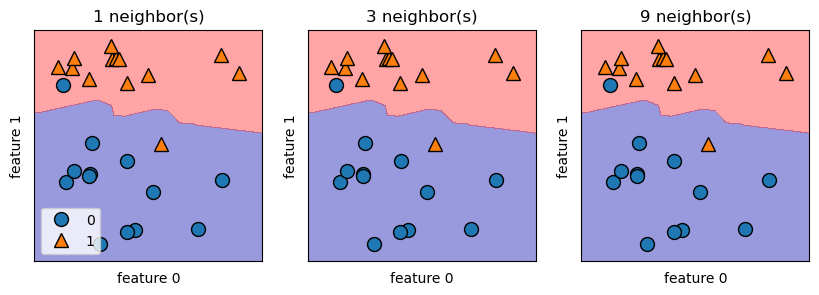

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(f"predict about test set : {clf.predict(X_test)}")
print(f"the score of test set : {round(clf.score(X_test, y_test), 2)}")

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### 1, 3, 9 - 최근접 이웃 분류 분석
위의 그림은 현재 1, 3, 9 이웃의 그림을 의미한다. 왼쪽 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있다. 이웃의 수를 늘릴수록 결정 경계는 더 부드러워 진다. 부드러운 경계는 더 단순한 모델을 의미한다. 

다시 말해 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다. 훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 된다. 즉, 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 에측값이 된다.

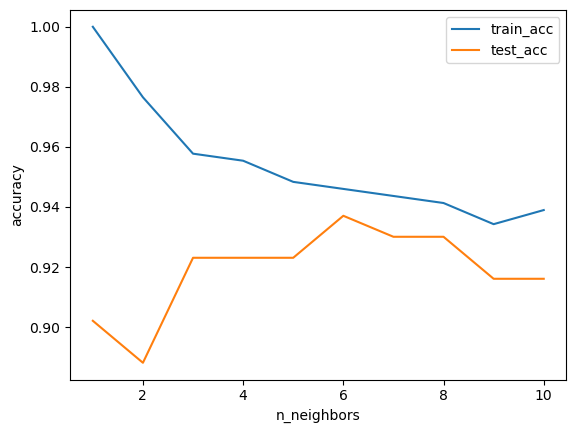

In [7]:
# 모델의 복잡도와 일반화 사이에서의 관계를 입증해보자.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# stratify = target값을 주로 지정하며, 클래스 별 분포를 test_size에 따라 맞춘다.
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer['target'], random_state=66)

trainning_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    trainning_accuracy.append(clf.score(X_train, y_train))
    # 테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(range(1, 11), trainning_accuracy, label = "train_acc")
plt.plot(range(1, 11), test_accuracy, label = "test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

위 그림은 n_neighbors 수 (x 축)에 따른 훈련 세트와 테스트 세트 정확도(y 축)을 보여주는데, 과대적합과 과소적합의 특징을 볼 수 있다.

최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽하다. 하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듭니다. 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때 보다 낮습니다. 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해줍니다. 반대로 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠집니다. 정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우입니다. 이 그래프의 범위를 눈여겨보면 가장 나쁜 정확도도 88%여서 수긍할 만 합니다.

### K-최근접 이웃 회귀


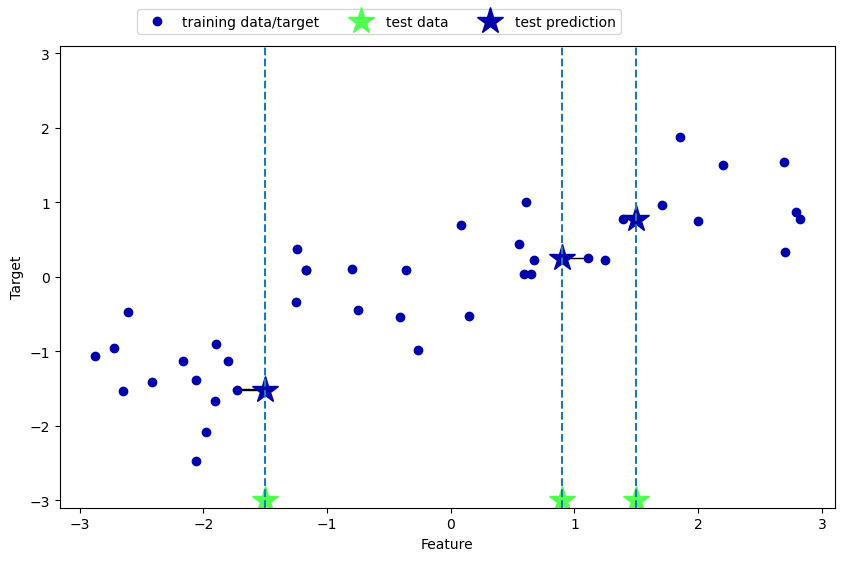

In [8]:
import mglearn

mglearn.plots.plot_knn_regression(n_neighbors=1)

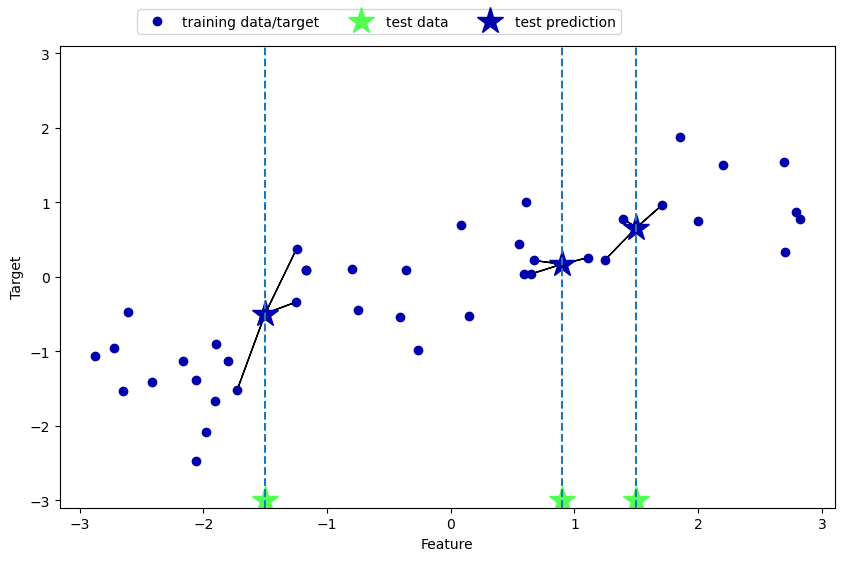

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

print("테스트 세트 예측 {}".format(reg.predict(X_test)))

테스트 세트 예측 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


### KNeighborsRegressor 분석

이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측할 수 있습니다.
이를 위해 x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듭니다.


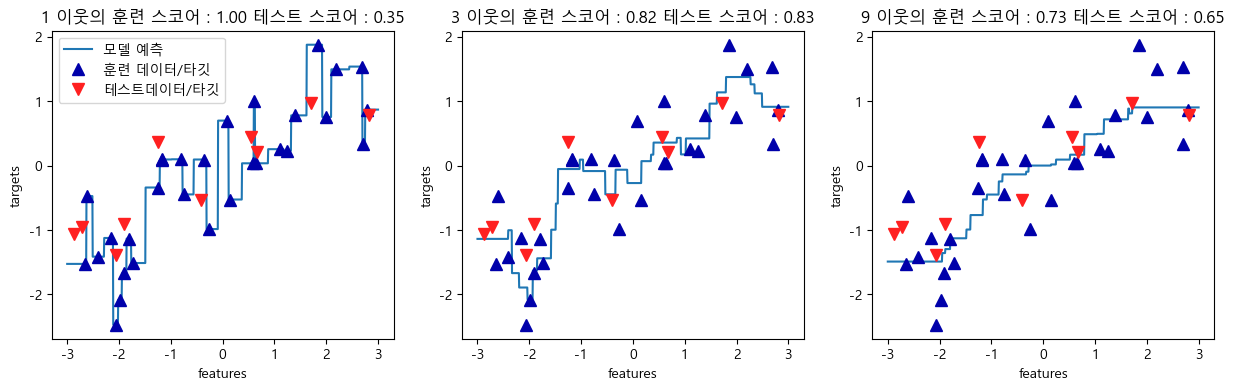

In [11]:
from matplotlib import font_manager
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 그래프 내에 한글 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False # 축 상에 - 부호 깨짐 방지

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
    )
    ax.set_xlabel("features")
    ax.set_ylabel("targets")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트데이터/타깃"], loc="best")

### 선형 모델

일반화된 예측함수는 y_hat = w[0] x x[0] + w[1] x x[1] + ... + w[p] x x[p] + b로, 이 식에서 x[0]부터 x[p]까지는 하나의 데이터 포인트에 대한 특성을 나타내며, w와b는 모델이 학습할 하이퍼 파라미터이다.

w[0]: 0.393906  b: -0.031804


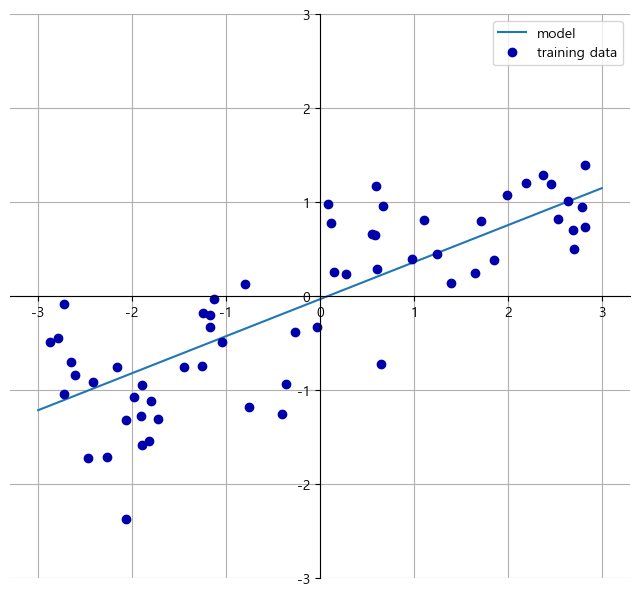

In [12]:
mglearn.plots.plot_linear_regression_wave()

# 회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면이 되는 회귀 모델의 특징을 가지고 있습니다.

### MSE(Mean Squared Error) : 최소 제곱법(선형 회귀)
선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균 제곱 오차를 최소화하는 파라미터 w와 b를 찾습니다. 평균 제곱 오차는 예측값과 타깃 값의 차이를 곱하여 더한 후에 샘플의 개수로 나눈 것입니다. 

특징으로는 하이퍼 파라미터가 없다는 것이지만, 그만큼 모델의 복잡도를 제어할 방법도 없습니다.

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터인 w는 가중치 또는 계수 라고 하며, lr 객체의 coef_ 속성에 저장되어 있습니다.
# 절편 파라미터인 b는 절편 또는 편향 이라고 하며, lr 객체의 intercept_ 속성에 저장되어 있습니다.
print(f"기울기(가중치) : {lr.coef_}")
print(f"절편(편향) : {lr.intercept_}")

# 기울기의 경우 특성 하나당 기울기 하나 의 식인 Numpy 배열로 반환됩니다. 현재 make_wave로 생성한 데이터셋의 특성은 한 개 이기 때문에 1개의 numpy 배열로 출력된 모습입니다.
# 훈련세트와 테스트세트의 성능을 확인해보겠습니다.
print(f"훈련 셋 성능 : {round(lr.score(X_train, y_train), 2)}")
print(f"테스트 셋 성능 : {round(lr.score(X_test, y_test), 2)}")

# 과대적합 : 데이터가 지나치게 훈련 데이터에 맞춰져 학습된 상태로, train_score - test_score 값이 너무 큰 경우를 이릅니다.
# 과소적합 : 두 데이터 셋 간 차이가 많이 나지는 않으나, 두 세트 모두 성능이 미미하게 나온 경우로, 모델이 지나치게 단순한 경우를 의미합니다.
# else : 데이터가 모델에 잘 맞춰져 훈련된 상태로, 최적의 상태를 의미합니다.

기울기(가중치) : [0.44197612]
절편(편향) : -0.0007945955888681022
훈련 셋 성능 : 0.72
테스트 셋 성능 : 0.59


In [19]:
# boston 데이터로 회귀 모델 만들기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(round(lr.score(X_train, y_train), 2)) 
print(round(lr.score(X_test, y_test), 2)) 

[-4.55764248e+02 -3.73813984e+01 -1.44727454e+02  2.77994757e+00
  1.93867727e+01  7.61064857e+01  3.47642854e+01 -7.73729551e+01
  4.23049543e+00  1.13592870e+02 -9.17868887e+00  1.13720854e+01
  6.50780150e+00  1.29011781e+01  2.65557388e+03  1.33990447e+03
  2.36439460e+02 -1.39528845e+02  4.79852326e+01  3.08250386e+01
 -1.02444100e+02  8.83726963e+02 -1.69786764e+03  2.70409082e+02
  1.09501963e+01  7.24641383e+01 -6.34431068e+00 -1.43147647e+01
 -9.50559075e+00 -6.68295653e+01  9.74991415e+00 -2.43537702e+00
 -5.06227701e+00 -2.09154030e+01  3.57741358e+01 -9.59932222e+00
  5.09887577e+01 -1.65688933e+01  3.22237614e+01 -6.95674232e+00
  8.94429060e+00  3.56446130e+01  9.51755876e+00  4.76028205e+01
 -2.75222517e+01  6.30851660e+00 -1.89478237e+00  9.36701125e+01
 -1.67766004e+01  2.77994757e+00 -1.08535871e+01 -2.81621392e+01
 -3.92193659e+00  8.87071729e+00 -1.52267914e+01  1.51558599e+01
 -4.14543602e+00  2.10982141e+01 -1.02169135e+01 -1.25474938e+01
 -1.87012618e+00 -2.17936

### Ridge 회귀

ridge의 경우 기존 선형 회귀 모델에서 규제를 추가하여 추가 제약 조건을 만족시키는 모델입니다. 가중치의 절댓값을 가능한 한 적게 만들어 w의 모든 원소가 0에 가깝게 만듭니다. 이러한 규제를 L2 규제라고 합니다.

In [22]:
from sklearn.linear_model import Ridge

rig = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"{round(rig.score(X_train, y_train), 2)}")
print(f"{round(rig.score(X_test, y_test), 2)}")

0.9
0.91
